# Optimization

Finding maxima and minima of a function $f(x)$.


## Motivation

Many problems in engineering involve optimization. There will be often a set of constraints and an objective, and the engineer wil need to achieve optimally the objective (maximize speed, effectiveness, minimize cost) within the constraints. We will learn here how to combine those.

In general, an engineer will encounter optimization problems which involve:

* An _objective function_
* _Design variables_.
* _Constraints_

# One-dimensional unconstrained optimization

## Newton's method

Basically, finding the zeros of $f'(x)$ through Newton-Raphson. Therefore, we need to be able to calculate $f''(x)$.

### Example

Use Newton’s method to find the
maximum of

$$f(x) = 2 sin(x) − \frac{x^2}{2} $$

Use

$$x_0 = 2.5$$

We will need $f'(x)$ and $f''(x)$. Luckily, these ones are easy:

$$f'(x) = 2cos(x) - x$$

$$f''(x) = -2sin(x) - 1$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return 2 * np.sin(x) - x ** 2 / 2

f(2.5)

-1.928055711792087

In [2]:
def fprime(x):
    return 2 * np.cos(x) - x

def fprimeprime(x):
    return -2 * np.sin(x) - 1

With that, we can just copy over the `newton_raphson` function from section 02 and apply it to our current problem:

In [3]:
def newton_raphson(f, fprime, x0=1, es=0.0005, max_iterations=100):
    
    ea=1
    iteration=0
    
    while abs(ea) > es and iteration < max_iterations:
        x1 = x0 - f(x0) / fprime(x0)
        ea = (x1 - x0) / x1
        x0 = x1
        iteration += 1
    
    return x0
    
critical_point = newton_raphson(fprime, fprimeprime, 2.5)
critical_point

1.0298665715985984

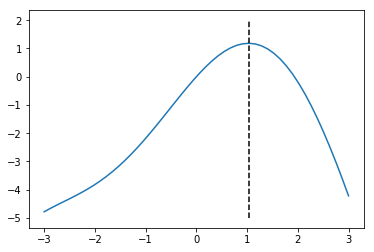

In [4]:
xs = np.linspace(-3, 3)
ys = f(xs)

plt.plot(xs, ys)
plt.plot([critical_point] * 3, [-5, -1, 2], linestyle='--', c='black');

# Multidimensional unconstrained optimization

It's much the same, but now our function will take a vector instead of a scalar.

$$f\left(\underline{x} \right): \Bbb{R}^n \rightarrow \Bbb{R}$$

* Direct Methods: or _nongradient_, because they don't require that we evaluate the derivative.

* Gradient Methods: Also known as _descent_ methods. We need a derivative.

## Direct Methods

### Random Search

Or brute force. It can work for discontinuous, non-differentiable functions. However, it is extremely computationally expensive.

### Heuristic approaches

They try to make educated guesses instead of guessing wildly.

* Genetic Algorithms
* Simulated Annealing
* Tabu Search
* Artificial Neural Networks.


## Gradient Methods

The gradient indicates the maximum growth direction, while the Hessian matrix indicates the convexity.


<img src="http://ludovicarnold.altervista.org/wp-content/uploads/2015/01/gradient-trajectory.png" alt="Gradient descent" style="width: 600px; float: left;"/>

Find here an very clear explanation of the [Hessian](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian) and why its determinant shows convexity.

If we can't calculate the derivatives, we can approximate them numerically.

### Newton's method and Gradient Descent

While Newton's method converges very fast, it requires knowledge of the second derivative. When an analytical expression is not available, computing the second derivative numerically is computationally very expensive, and prone to numerical error. Therefore, Newton's method is rarely used for highly multidimensional optimization problems like those found in Machine Learning.

In contrast, gradient descent only requires knowledge of the first derivative, so it is one of the most widely used optimization approaches in Machine Learning.



### Plotting Bidimensional functions 

We need to create a meshgrid. 

See [pyplot.contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html) and [numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html#numpy.meshgrid)

Example: 

$$f(x) = e^{-(x - 1)^2 - (y-1)^2}$$

```python
xs = np.linspace(-3, 3)
ys = np.linspace(-3, 3)
xs, ys = np.meshgrid(xs, ys)

zs = np.exp(-(xs - 1)**2 - (ys - 1)**2)
plt.contour(xs, ys, zs);

```

In [5]:
np.meshgrid(xs, ys)

[array([[-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ],
        [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ],
        [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ],
        ...,
        [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ],
        [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ],
        [-3.        , -2.87755102, -2.75510204, ...,  2.75510204,
          2.87755102,  3.        ]]),
 array([[-4.78224002, -4.78224002, -4.78224002, ..., -4.78224002,
         -4.78224002, -4.78224002],
        [-4.66211841, -4.66211841, -4.66211841, ..., -4.66211841,
         -4.66211841, -4.66211841],
        [-4.54917406, -4.54917406, -4.54917406, ..., -4.54917406,
         -4.54917406, -4.54917406],
        ...,
        [-3.04141319, -3.04141319, -3.04141319, ..., -

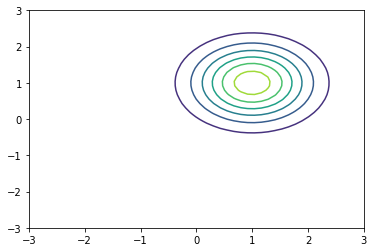

In [6]:
xs = np.linspace(-3, 3)
ys = np.linspace(-3, 3)
xs_mesh, ys_mesh = np.meshgrid(xs, ys)

zs = np.exp(-(xs_mesh - 1)**2 - (ys_mesh - 1)**2)
plt.contour(xs, ys, zs);

#### Exercise

Plot 

$$ f(x,y) = x^2 - y^2$$

using a contour plot.

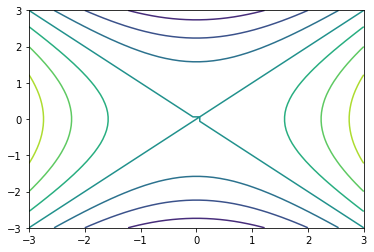

In [7]:
xs = np.linspace(-3, 3)
ys = np.linspace(-3, 3)
xs_mesh, ys_mesh = np.meshgrid(xs, ys)

zs = xs_mesh**2 - ys_mesh **2
plt.contour(xs, ys, zs);

## Newton's method

Descend the gradient following:

$$\underline{x}_{i+1} = \underline{x}_i - \mathbb{H}_f(\underline{x}_i)^{-1}\nabla(\underline{x}_i)$$

### Example 

Consider

$$f(x,y) = 2xy + 3x + 5y^3 + x^ 2$$

* Find all critical points analytically.
* For each point, decide whether it’s a maximum, a minimum or a saddle point.
* Perform 3 iterations of the Newton method using $(x_0 , y_0) = (−3, 0)$.
* Plot it using `numpy` and `matplotlib`.

In [8]:
def f(x, y):
    return 2 * x*y + 3 * x + 5 * y**3 + x**2

def grad(x, y): 
    dfdx = 2*y + 3 + 2*x
    dfdy = 2*x + 15*y**2 
    
    return np.array([dfdx, dfdy]).reshape(2,1)

def hess(x, y):
    dfdxdx = 2
    dfdydy = 30*y
    dfdxdy = 2
    dfdydx = 2
    
    return np.array([dfdxdx, dfdxdy, dfdydx, dfdydy]).reshape(2,2)
    
grad(-3, 0)

array([[-3],
       [-6]])

That value means that the slope is pointing to the top left. The Hessian at the same point is:

In [9]:
hess(-3, 0)

array([[2, 2],
       [2, 0]])

Side note: in Python, we can unpack the values of a sequence to feed them to each of the arguments of a function which takes several arguments:

In [10]:
def function_of_two(a, b):
    return('the first argument is "%s", the second is "%s"' % (a, b))

sequence = ['two', 'words']

function_of_two(sequence)

TypeError: function_of_two() missing 1 required positional argument: 'b'

In [11]:
function_of_two(*sequence)

'the first argument is "two", the second is "words"'

This comes in handy to unpack the x vectors in Newton's method:

In [12]:
import numpy.linalg as la

x0 = np.array([-3, 0]).reshape(2,1)

x1 = x0 - la.inv(hess(*x0)).dot(grad(*x0))
x1

array([[ 0. ],
       [-1.5]])

In [13]:
la.inv(hess(*x0))

array([[ 0. ,  0.5],
       [ 0.5, -0.5]])

In [14]:
x0 = np.array([-3, 0]).reshape(2,1)

ea = 1
es = 0.01
steps = []

while ea > es:
    x1 = x0 - la.inv(hess(*x0)).dot(grad(*x0))
    ea =  la.norm(x1 - x0)
    steps.append(x0)
    x0 = x1

steps

[array([[-3],
        [ 0]]), array([[ 0. ],
        [-1.5]]), array([[-0.71808511],
        [-0.78191489]]), array([[-1.02191343],
        [-0.47808657]]), array([[-1.10664137],
        [-0.39335863]]), array([[-1.11444402],
        [-0.38555598]])]

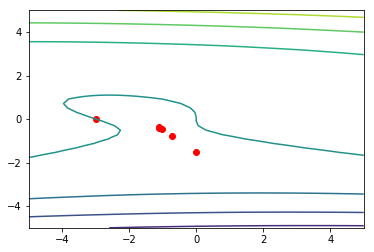

In [15]:
xs = np.linspace(-5, 5)
ys = np.linspace(-5, 5)
xs_mesh, ys_mesh = np.meshgrid(xs, ys)

fs = f(xs_mesh, ys_mesh)
plt.contour(xs, ys, fs)
plt.scatter(*zip(*steps), c='red')

In [16]:
result = steps[-1]
grad(*result)

array([[-4.44089210e-16],
       [ 9.13218282e-04]])

In [17]:
la.det(hess(*result))

-27.133359032519458

# Constrained optimization 

* Objective function
* Restrictions

## Linear programming

Objective function and constraints are all linear.

"Programming" here is used as "scheduling", not "computer programming".

#### Example

Suppose that a gas-processing plant receives a fixed
amount of raw gas each week. The raw gas is
processed into two grades of heating gas: regular
and premium quality. These grades of gas are in
high demand (i.e., we can take for granted that
they’ll sell as much as they produce) and yield
different profits to the company. However, their
production involves both time and on-site storage
constraints. For example, only one of the grades can
be produced at a time, and the facility is open only
for 80 hr./week. Further, there is limited on-site
storage for each of the products. All these factors
are listed in the following table:

|Resource| Regular Gas| Premium gas| Resource availability|
|--------|------------|------------|----------------------|
|Raw gas | 7 $m^3/ton$| 11$m^3/ton$| 77$m^3/week$|
|Production time | 10 $hr/ton$ | 8 $hr/ton$| 80$hr/week$|
|Storage | 9 $ton$| 6 $ton$ ||
|Profit | 150 $€/ton$| 175  $€/ton$||




Objective function: profit

$$z = 150 x_1 + 175 x_2$$

Constraints:

$$7 x_1 + 11 x_2 \leq 77$$

$$10 x_1 + 8 x_2 \leq 80$$

$$x_1 \leq 9$$

$$x_2 \leq 6$$

$$x_1 \geq 0$$

$$x_2 \geq 0$$


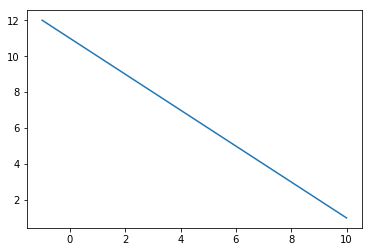

In [18]:
x1s = np.linspace(-1, 10)
x2s = np.linspace(-1, 10)

constraint_1 = (77 - 7*x1s) / 7

plt.plot(x1s, constraint_1);

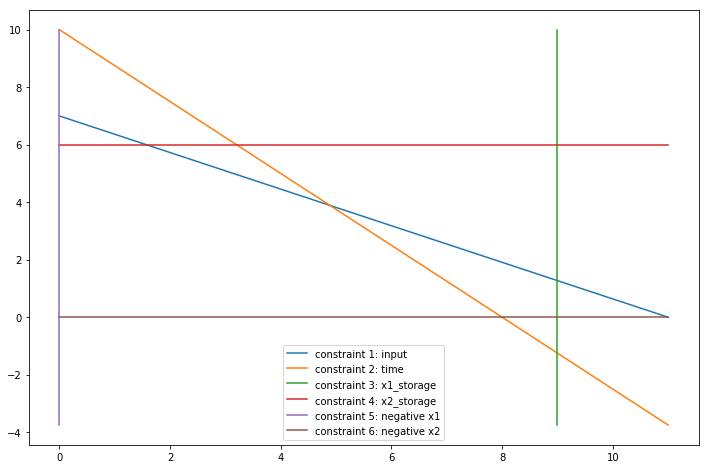

In [19]:
xs = np.linspace(0, 11)

const_1 = (77 - 7*xs) / 11
const_2 = (80 - 10*xs) / 8
const_3 = 9
const_4 = 6
const_5 = 0
const_6 = 0

plt.plot(xs, const_1, label="constraint 1: input")
plt.plot(xs, const_2, label="constraint 2: time")
plt.plot([const_3] * len(const_2), const_2, label="constraint 3: x1_storage")
plt.plot(xs, [const_4] * len(xs), label="constraint 4: x2_storage")
plt.plot([const_5] * len(const_2), const_2, label="constraint 5: negative x1")
plt.plot(xs, [const_6] * len(xs), label="constraint 6: negative x2")
plt.gcf().set_size_inches(12,8)
plt.legend();

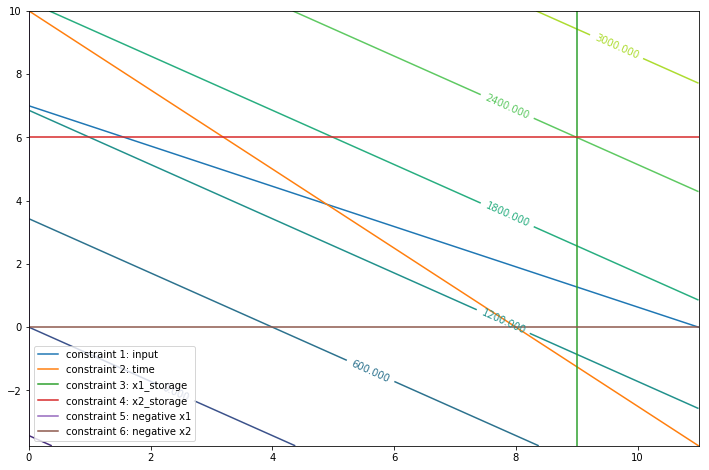

In [20]:
xs = np.linspace(0, 11)

const_1 = (77 - 7*xs) / 11
const_2 = (80 - 10*xs) / 8
const_3 = 9
const_4 = 6
const_5 = 0
const_6 = 0

xs_mesh, ys_mesh = np.meshgrid(xs, const_2)
def objective(x, y):
    return 150*x + 175 * y

plt.plot(xs, const_1, label="constraint 1: input")
plt.plot(xs, const_2, label="constraint 2: time")
plt.plot([const_3] * len(const_2), const_2, label="constraint 3: x1_storage")
plt.plot(xs, [const_4] * len(xs), label="constraint 4: x2_storage")
plt.plot([const_5] * len(const_2), const_2, label="constraint 5: negative x1")
plt.plot(xs, [const_6] * len(xs), label="constraint 6: negative x2")
plt.gcf().set_size_inches(12,8)

cs= plt.contour(xs_mesh, ys_mesh, objective(xs_mesh, ys_mesh))
plt.gca().clabel(cs, inline=1, fontsize=10)
plt.legend();

### Posible situations

* Unique solution.

* Alternate solutions.

* No feasible solution.

* Unbounded problems.

### The simplex method

As we just saw, the optimal point will be an extreme point. The simplex method relies on this to find optimal solutions. It does this by reformulating the constraints to be equalities. It does this by introducing _slack variables_.

## Nonlinear programming

* Indirect methods
* Direct methods: generalized gradient search

# Problems

#### Exercise

The trajectory of a ball can be described by:

$$y =(tan\theta_0)x - \frac{g}{2v_0^2cos^2\theta_0}x^2 + y_0$$

where $y$ = the height (m), $\theta_0$ = the initial angle (radians), $v_0$ = the initial velocity (m/s), $g$ = the gravitational constant $9.81 m/s^2$, and $y_0$ = the initial height (m). 

Use bisection search like we did in section 02 to find roots of equations, but this time to determine the maximum height given $y_0 = 1 m$, $v_0 = 25 m/s$ and $\theta_0= 50$. Iterate until the approximate error falls below $\epsilon_s = 1%$ using initial guesses of $x_l = 0$ and $x_u = 60 m$.

#### Exercise

Perform three iterations of the optimal gradient steepest descent method to locate the minimum of 

$$f(x, y) = −8x + x^2 + 12y + 4y^2 − 2x y$$

using initial guesses $x = 0$ and $y = 0$.

Plot the function and the steps you took.

#### Exercise

Given the following function,

$$f(x, y) = −8x + x^2 + 12y + 4y^2 − 2x y$$

use Python to determine the minimum:

* Graphically.
* Numerically.
* Substitute the result of (b) back into the function to determine the minimum $f (x, y)$.
* Determine the Hessian and its determinant, and substitute the result of part (b) back into the latter to verify that a minimum has been detected.

# Further reading

[Genetic Algorithms]

[Simulated Annealing]

[Tabu Search]

[Artificial Neural Networks]

[Newton's method versus gradient descent]

[Genetic Algorithms]: https://en.wikipedia.org/wiki/Genetic_algorithm
[Simulated Annealing]: https://www.mathworks.com/help/gads/what-is-simulated-annealing.html
[Tabu Search]: http://www.cleveralgorithms.com/nature-inspired/stochastic/tabu_search.html
[Artificial Neural Networks]: https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.53329&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
[Newton's method versus gradient descent]: https://stats.stackexchange.com/questions/253632/why-is-newtons-method-not-widely-used-in-machine-learning